In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titaniclogreg/train.csv
/kaggle/input/titaniclogreg/test.csv
/kaggle/input/test-file/tested.csv
/kaggle/input/titanic/train_and_test2.csv


# **Titanic LOg Reg Model**

In [2]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 155 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.2 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 0.24.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = pd.read_csv('../input/titaniclogreg/train.csv')
x.head()
y = pd.read_csv('../input/titaniclogreg/test.csv')

In [5]:
x.isnull() #because many data are missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


# **EDA**

<AxesSubplot:>

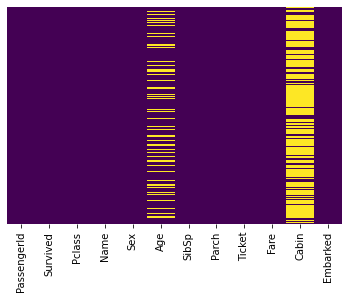

In [6]:
sns.heatmap(x.isnull(),yticklabels = False,cbar = False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

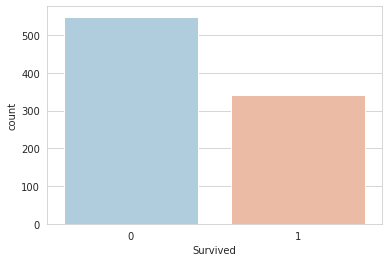

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=x,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

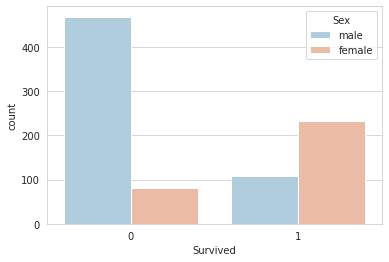

In [8]:
#To differentiate between men and women
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = x, hue = 'Sex', palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

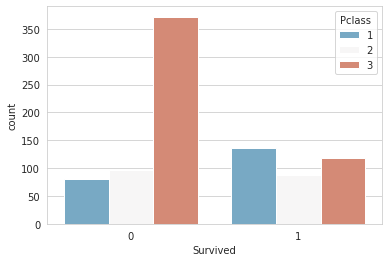

In [9]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = x, hue = 'Pclass', palette = 'RdBu_r')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

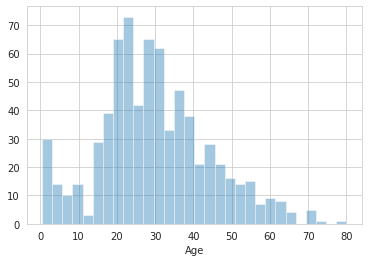

In [10]:
sns.distplot(x['Age'].dropna(), kde = False, bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

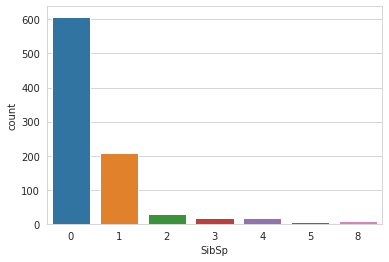

In [11]:
sns.countplot(x = 'SibSp', data = x)

<AxesSubplot:>

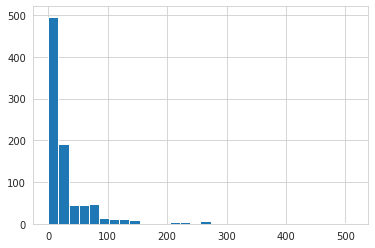

In [12]:
x['Fare'].hist(bins = 30)

# **Data Cleaning**

To fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). 

In [13]:
#To obtain the average age of people from each class
x.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [14]:
x['Age'][5]

nan

In [15]:
def add_age(x):
    if x.isnull()[0]:
         if x[1] == 1:
            return 38
         elif x[1] == 2:
            return 29
         else :
            return 25
    else:
        return x[0]
x['Age'] = x[['Age', 'Pclass']].apply(add_age, axis = 1)   

<AxesSubplot:>

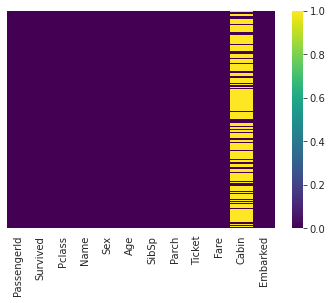

In [16]:
sns.heatmap(x.isnull(),yticklabels = False, cmap='viridis')

In [17]:
x.drop('Cabin', axis = 1, inplace = True)

In [18]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## **Cateogrical Features**

In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
sex = pd.get_dummies(x['Sex'], drop_first = True)

In [21]:
embark = pd.get_dummies(x['Embarked'], drop_first = True)

In [22]:
x.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [23]:
x = pd.concat([x, sex,embark], axis = 1)

In [24]:
x.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# **Builiding LogReg**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x[['Pclass','male','Age','SibSp','Parch','Fare','Q','S']]

,Pclass,male,Age,SibSp,Parch,Fare,Q,S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,1
887,1,0,19.0,0,0,30.0000,0,1
888,3,0,25.0,1,2,23.4500,0,1
889,1,1,26.0,0,0,30.0000,0,0


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x.drop('Survived', axis =1), x['Survived'], test_size = 0.30)

In [28]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
168,169,1,38.0,0,0,25.9250,1,0,1
223,224,3,25.0,0,0,7.8958,1,0,1
763,764,1,36.0,1,2,120.0000,0,0,1
90,91,3,29.0,0,0,8.0500,1,0,1
697,698,3,25.0,0,0,7.7333,0,1,0
...,...,...,...,...,...,...,...,...,...
515,516,1,47.0,0,0,34.0208,1,0,1
746,747,3,16.0,1,1,20.2500,1,0,1
218,219,1,32.0,0,0,76.2917,0,0,0
696,697,3,44.0,0,0,8.0500,1,0,1


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()